In [99]:
import pandas as pd
df =pd.read_csv('cleaned_consumer_complaint.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,category_id,Cleaned_consumer_complaint
0,0,placed foreclosure violation ca homeowners ill...
1,1,response correspondence received dated enclose...
2,2,notified usaa not relaying information timely ...
3,3,debt cleared chapter told repeatedly since sta...
4,4,inquires credit report company shouldnt


In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Cleaned_consumer_complaint'], 
                                                    df['category_id'], 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=df['category_id'])

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1541,) (661,) (1541,) (661,)


In [101]:
##################################
#COUNT VECTORIZER MACHINE LEARNING 
#################################
#RESULTS 
#################################
                           #5 fold CROSS VALIDATION ACCURACY 
#LinearSVC                 0.601696
#LogisticRegression        0.637696
#MultinomialNB             0.674154
#RandomForestClassifier    0.361392

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()



In [103]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_consumer_complaint'], df['category_id'], random_state= 0,test_size=0.2)
X_train_count = vectorizer.fit_transform(X_train)

#linear svc model
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_count, y_train)
from sklearn import metrics
y_pred = clf.predict(vectorizer.transform(X_test))
print(metrics.classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
#indiviadual prediction 
print(clf.predict(vectorizer.transform(['I have outdated information on my credit report'])))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.60      0.57      0.59        82
           2       0.00      0.00      0.00         5
           3       0.67      0.83      0.74       103
           4       0.71      0.57      0.63        42
           5       0.24      0.30      0.26        27
           6       0.00      0.00      0.00         3
           7       0.50      0.56      0.53        27
           8       0.72      0.66      0.69        32
           9       0.00      0.00      0.00         8
          10       0.53      0.32      0.40        25
          11       0.25      0.33      0.29         3
          12       0.00      0.00      0.00         1
          13       1.00      0.40      0.57         5

    accuracy                           0.63       441
   macro avg       0.43      0.39      0.39       441
weighted avg       0.62      0.63      0.62       441

0.6303854875283447
[1]


C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
features = vectorizer.fit_transform(df.Cleaned_consumer_complaint).toarray()
labels = df.category_id
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV,verbose=1)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\INE12363221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

model_name
LinearSVC                 0.618071
LogisticRegression        0.658495
MultinomialNB             0.688924
RandomForestClassifier    0.349691
Name: accuracy, dtype: float64

In [105]:
#count vectorizer representation 
print(x_train[0])
print(X_train_count[0])

placed foreclosure violation ca homeowners illegal foreclosure continues nationstar mortgage bank loans placed home sale auction property purchased loan represented property habitable potable water domestic well serves source water property told time sale water potable safe since learned lender not obtain lender required prior approval loan property within miles site lies adjacent agricultural land drank cooked showered used water personal hygiene several years learned hazardous significant levels contaminations aquifers feed well unable use water personal use e drinking cooking showering hygiene etc disclosure contaminations define property hazardous toic contaminated uninhabitable polluted blighted nuisance defined ca federal agencies contaminations remain steady state learned aquifer contaminations eisted long property purchase would not purchased property knowledge contaminations learned lender area approve loan contaminated property lender required discloses contamination contamin

In [106]:
##################################
# TFIDF WORD N GRAM  MACHINE LEARNING 
#################################
#RESULTS 
#################################
                           #5 fold CROSS VALIDATION ACCURACY 
# LinearSVC                 0.708814
# LogisticRegression        0.693966
# MultinomialNB             0.583257
# RandomForestClassifier    0.401442

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english', #to remove all common pronouns to reduce the number of noisy features
                       analyzer='word')
features_word = tfidf.fit_transform(df.Cleaned_consumer_complaint).toarray()
labels = df.category_id

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_word, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.715713
LogisticRegression        0.698916
MultinomialNB             0.580839
RandomForestClassifier    0.381477
Name: accuracy, dtype: float64

In [109]:
##################################
# TFIDF CHARACTER  N GRAM  MACHINE LEARNING 
#################################
#RESULTS 
#################################
                           #5 fold CROSS VALIDATION ACCURACY 
# model_name
# LinearSVC                 0.745647
# LogisticRegression        0.736452
# MultinomialNB             0.539059
# RandomForestClassifier    0.465137

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,4), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english', #to remove all common pronouns to reduce the number of noisy features
                       analyzer='char')
features_char = tfidf.fit_transform(df.Cleaned_consumer_complaint).toarray()
labels = df.category_id

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_char, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.712541
LogisticRegression        0.687560
MultinomialNB             0.465486
RandomForestClassifier    0.475493
Name: accuracy, dtype: float64

In [112]:
#######################################################
#HYBRID TFIDF 
#######################################################
                           #5 fold CROSS VALIDATION ACCURACY 
# model_name
# LinearSVC                 0.749308
# LogisticRegression        0.748505
# MultinomialNB             0.546202
# RandomForestClassifier    0.451032

In [113]:
#let us combine both word and char 
import numpy as np
feature_word_char =  np.hstack((features_word, features_char))
labels = df.category_id

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, feature_word_char, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.718899
LogisticRegression        0.711183
MultinomialNB             0.514071
RandomForestClassifier    0.489568
Name: accuracy, dtype: float64

In [115]:
######################################
#UNIDIRECTIONAL LSTM /GRU WITHOUT PRETRAINED MODEL
######################################


In [116]:
#TEXT PREPROCESSING FOR NURAL NETWORK 
#1. TOKENIZE THE CORPUS 
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['Cleaned_consumer_complaint'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9688 unique tokens.


In [117]:
word_index

{'not': 1,
 'credit': 2,
 'account': 3,
 'would': 4,
 'loan': 5,
 'payment': 6,
 'told': 7,
 'report': 8,
 'information': 9,
 'bank': 10,
 'debt': 11,
 'n': 12,
 'received': 13,
 'time': 14,
 'company': 15,
 'card': 16,
 'called': 17,
 'never': 18,
 'pay': 19,
 'mortgage': 20,
 'paid': 21,
 'get': 22,
 'payments': 23,
 'letter': 24,
 'back': 25,
 'call': 26,
 'could': 27,
 'sent': 28,
 'also': 29,
 'amount': 30,
 'phone': 31,
 'said': 32,
 'due': 33,
 'made': 34,
 'balance': 35,
 'one': 36,
 'collection': 37,
 'number': 38,
 'still': 39,
 'money': 40,
 'since': 41,
 'interest': 42,
 'asked': 43,
 'days': 44,
 'reporting': 45,
 'month': 46,
 'late': 47,
 'even': 48,
 'home': 49,
 'make': 50,
 'years': 51,
 'us': 52,
 'check': 53,
 'months': 54,
 'help': 55,
 'service': 56,
 'times': 57,
 'date': 58,
 'contacted': 59,
 'complaint': 60,
 'day': 61,
 'accounts': 62,
 'new': 63,
 'like': 64,
 'request': 65,
 'fees': 66,
 'please': 67,
 'dispute': 68,
 'know': 69,
 'stated': 70,
 'contact': 

In [118]:
X = tokenizer.texts_to_sequences(df['Cleaned_consumer_complaint'].values)
X

[[283,
  218,
  430,
  202,
  1264,
  488,
  218,
  623,
  589,
  20,
  10,
  72,
  283,
  49,
  215,
  1344,
  165,
  500,
  5,
  1576,
  165,
  4553,
  3369,
  1224,
  3833,
  115,
  3000,
  1265,
  1224,
  165,
  7,
  14,
  215,
  1224,
  3369,
  2109,
  41,
  962,
  264,
  1,
  518,
  264,
  207,
  311,
  672,
  5,
  165,
  180,
  1306,
  871,
  1899,
  5839,
  5840,
  2238,
  5841,
  5842,
  5843,
  195,
  1224,
  196,
  4554,
  78,
  51,
  962,
  4555,
  1450,
  2742,
  1808,
  5844,
  3834,
  115,
  273,
  237,
  1224,
  196,
  237,
  370,
  5845,
  5846,
  5847,
  4554,
  546,
  685,
  1808,
  5848,
  165,
  4555,
  3835,
  3370,
  5849,
  5850,
  5851,
  5852,
  3371,
  202,
  279,
  235,
  1808,
  1196,
  3836,
  160,
  962,
  5853,
  1808,
  2110,
  386,
  165,
  303,
  4,
  1,
  500,
  165,
  450,
  1808,
  962,
  264,
  986,
  1809,
  5,
  3370,
  165,
  264,
  207,
  4556,
  3837,
  3370,
  165,
  963,
  316,
  1808,
  536,
  614,
  2743,
  3833,
  4557,
  321,
  1655,
  

In [119]:
#pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2202, 250)


In [120]:
#Handle categorical label 
Y = pd.get_dummies(df['category_id']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2202, 14)


In [121]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1981, 250) (1981, 14)
(221, 250) (221, 14)


In [122]:
EMBEDDING_DIM=100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128

In [123]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 14)                1414      
Total params: 5,081,814
Trainable params: 5,081,814
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
history_LSTM = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)


Train on 1981 samples, validate on 221 samples
Epoch 1/10
1981/1981 [==============================] - 32s 16ms/sample - loss: 2.5017 - accuracy: 0.2277 - val_loss: 2.2199 - val_accuracy: 0.2579
Epoch 2/10
1981/1981 [==============================] - 26s 13ms/sample - loss: 2.1781 - accuracy: 0.2433 - val_loss: 2.1893 - val_accuracy: 0.2579
Epoch 3/10
1981/1981 [==============================] - 25s 12ms/sample - loss: 2.1415 - accuracy: 0.2463 - val_loss: 2.1670 - val_accuracy: 0.2624
Epoch 4/10
1981/1981 [==============================] - 26s 13ms/sample - loss: 2.1100 - accuracy: 0.2842 - val_loss: 2.1541 - val_accuracy: 0.3032
Epoch 5/10
1981/1981 [==============================] - 26s 13ms/sample - loss: 1.9914 - accuracy: 0.4149 - val_loss: 1.9476 - val_accuracy: 0.4253
Epoch 6/10
1981/1981 [==============================] - 26s 13ms/sample - loss: 1.7131 - accuracy: 0.4695 - val_loss: 1.7530 - val_accuracy: 0.4615
Epoch 7/10
1981/1981 [==============================] - 27s 13ms/

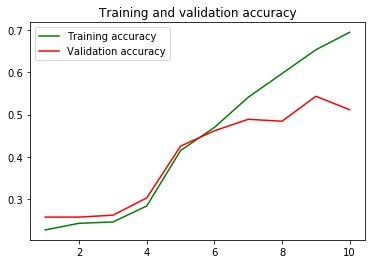

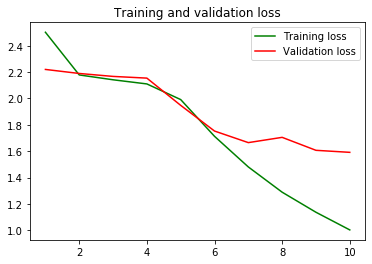

In [125]:
# Plot results
import matplotlib.pyplot as plt

acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [126]:
######################################
#BDIRECTIONAL LSTM /GRU WITHOUT PRETRAINED MODELI
######################################


In [127]:
EMBEDDING_DIM=100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Bidirectional
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128

In [128]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 250, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_7 (Dense)              (None, 14)                2814      
Total params: 5,163,614
Trainable params: 5,163,614
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
history_LSTM = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

Train on 1981 samples, validate on 221 samples
Epoch 1/10
1981/1981 [==============================] - 62s 31ms/sample - loss: 2.4262 - accuracy: 0.2287 - val_loss: 2.1959 - val_accuracy: 0.2534
Epoch 2/10
1981/1981 [==============================] - 49s 25ms/sample - loss: 2.1506 - accuracy: 0.2261 - val_loss: 2.1432 - val_accuracy: 0.2579
Epoch 3/10
1981/1981 [==============================] - 49s 25ms/sample - loss: 2.0098 - accuracy: 0.3387 - val_loss: 1.9755 - val_accuracy: 0.3620
Epoch 4/10
1981/1981 [==============================] - 54s 27ms/sample - loss: 1.8142 - accuracy: 0.3907 - val_loss: 1.8814 - val_accuracy: 0.4118
Epoch 5/10
1981/1981 [==============================] - 51s 26ms/sample - loss: 1.6512 - accuracy: 0.4427 - val_loss: 1.7742 - val_accuracy: 0.4661
Epoch 6/10
1981/1981 [==============================] - 52s 26ms/sample - loss: 1.5310 - accuracy: 0.4902 - val_loss: 1.7100 - val_accuracy: 0.4751
Epoch 7/10
1981/1981 [==============================] - 53s 27ms/

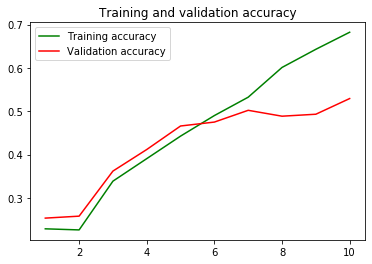

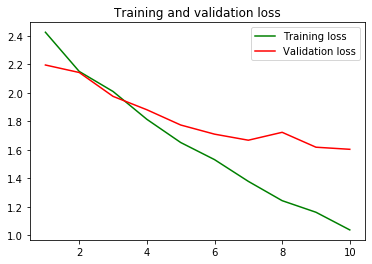

In [130]:
# Plot results
import matplotlib.pyplot as plt

acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [131]:
##############################################
#WORD2VEC PRETRAINED 
##############################################

In [132]:
# import gensim.downloader as api
# word2vec_model = api.load('word2vec-google-news-300')

In [133]:
embedding_dim=300
#word_index represents number of different word 
#make a  matrix of zeros with rows = numner of words and columns =300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#if the word is not present in model that we have impoeted then that word vector will be replaced in
#embedding matrix otherwise it will remain 0 as we have defined 

for word, i in word_index.items():
    if word in word2vec_model: 
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector

NameError: name 'word2vec_model' is not defined